In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Downloads/Customer-Churn-analysis-main/Customer-Churn-analysis-main/Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
 df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tunure is 0 and no total charges are recorded

In [7]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float") 

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
df["customerID"].duplicated().sum()

np.int64(0)

In [33]:
def conv(value):
    if value == 1:
       return "yes"
    else:
       return "no"
    
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv) 

#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand 

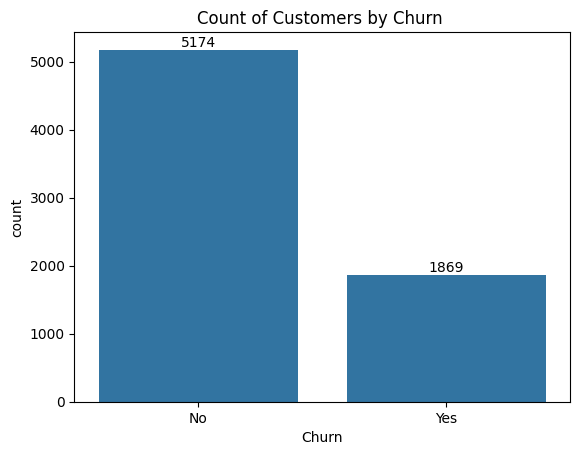

In [15]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn ")
plt.show()

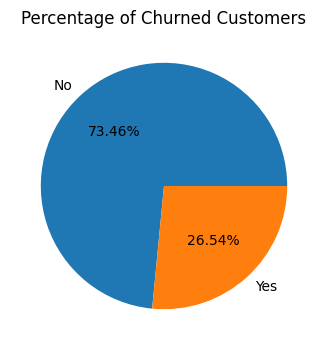

In [16]:
plt.figure(figsize = (4,4))
gb = df.groupby("Churn").agg({'Churn': "count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers")
plt.show()

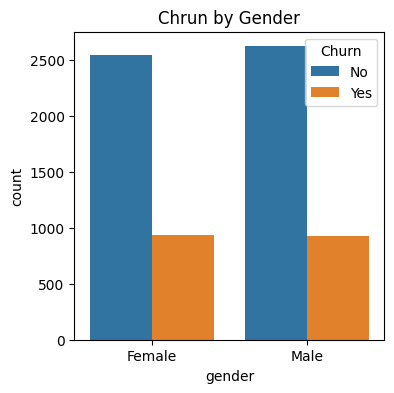

In [4]:
plt.figure(figsize = (4,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Chrun by Gender")
plt.show()

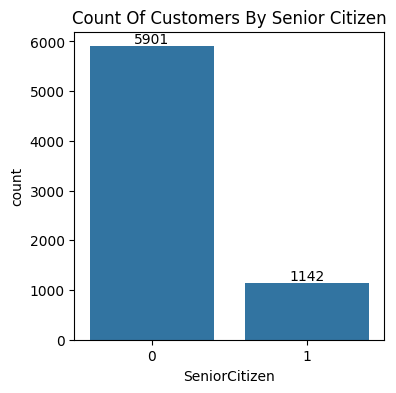

In [14]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df) 
ax.bar_label(ax.containers[0])
plt.title("Count Of Customers By Senior Citizen")
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_14432\1410922638.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, crosstab.iloc[i, j]/2 + crosstab.iloc[i].cumsum()[j-1] if j > 0 else crosstab.iloc[i, j]/2,


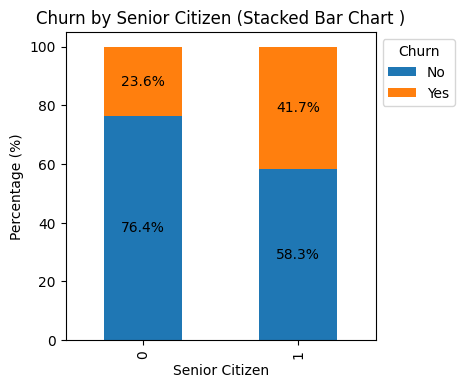

In [12]:
crosstab = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(4, 4), color=['#1f77b4', '#ff7f0e'])

# Add labels and title
plt.title('Churn by Senior Citizen (Stacked Bar Chart )')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage (%)')

# Add percentage labels to each section of the bars
for i in range(crosstab.shape[0]):
    for j in range(crosstab.shape[1]):
        plt.text(i, crosstab.iloc[i, j]/2 + crosstab.iloc[i].cumsum()[j-1] if j > 0 else crosstab.iloc[i, j]/2,
                 f'{crosstab.iloc[i, j]:.1f}%', ha='center', va='center', color='black')

plt.legend(title="Churn", loc='upper left', bbox_to_anchor=(1,1))
plt.show()

#comparative a greater pecentage of people in senior citizen category have Churned

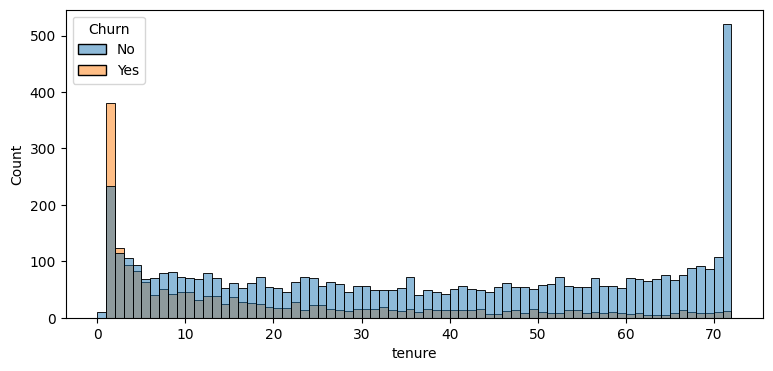

In [19]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72 , hue = "Churn" )
plt.show()


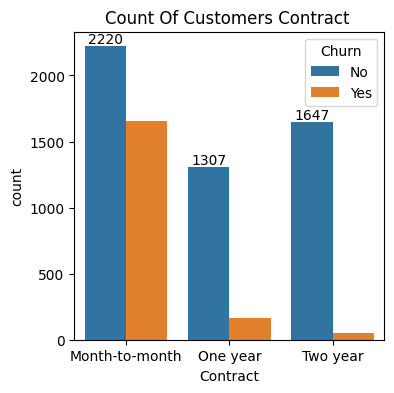

In [21]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df , hue = "Churn") 
ax.bar_label(ax.containers[0])
plt.title("Count Of Customers Contract ")
plt.show()

#people who have month to month contract are likely to Churn then from those who have one or two year of contract

In [22]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

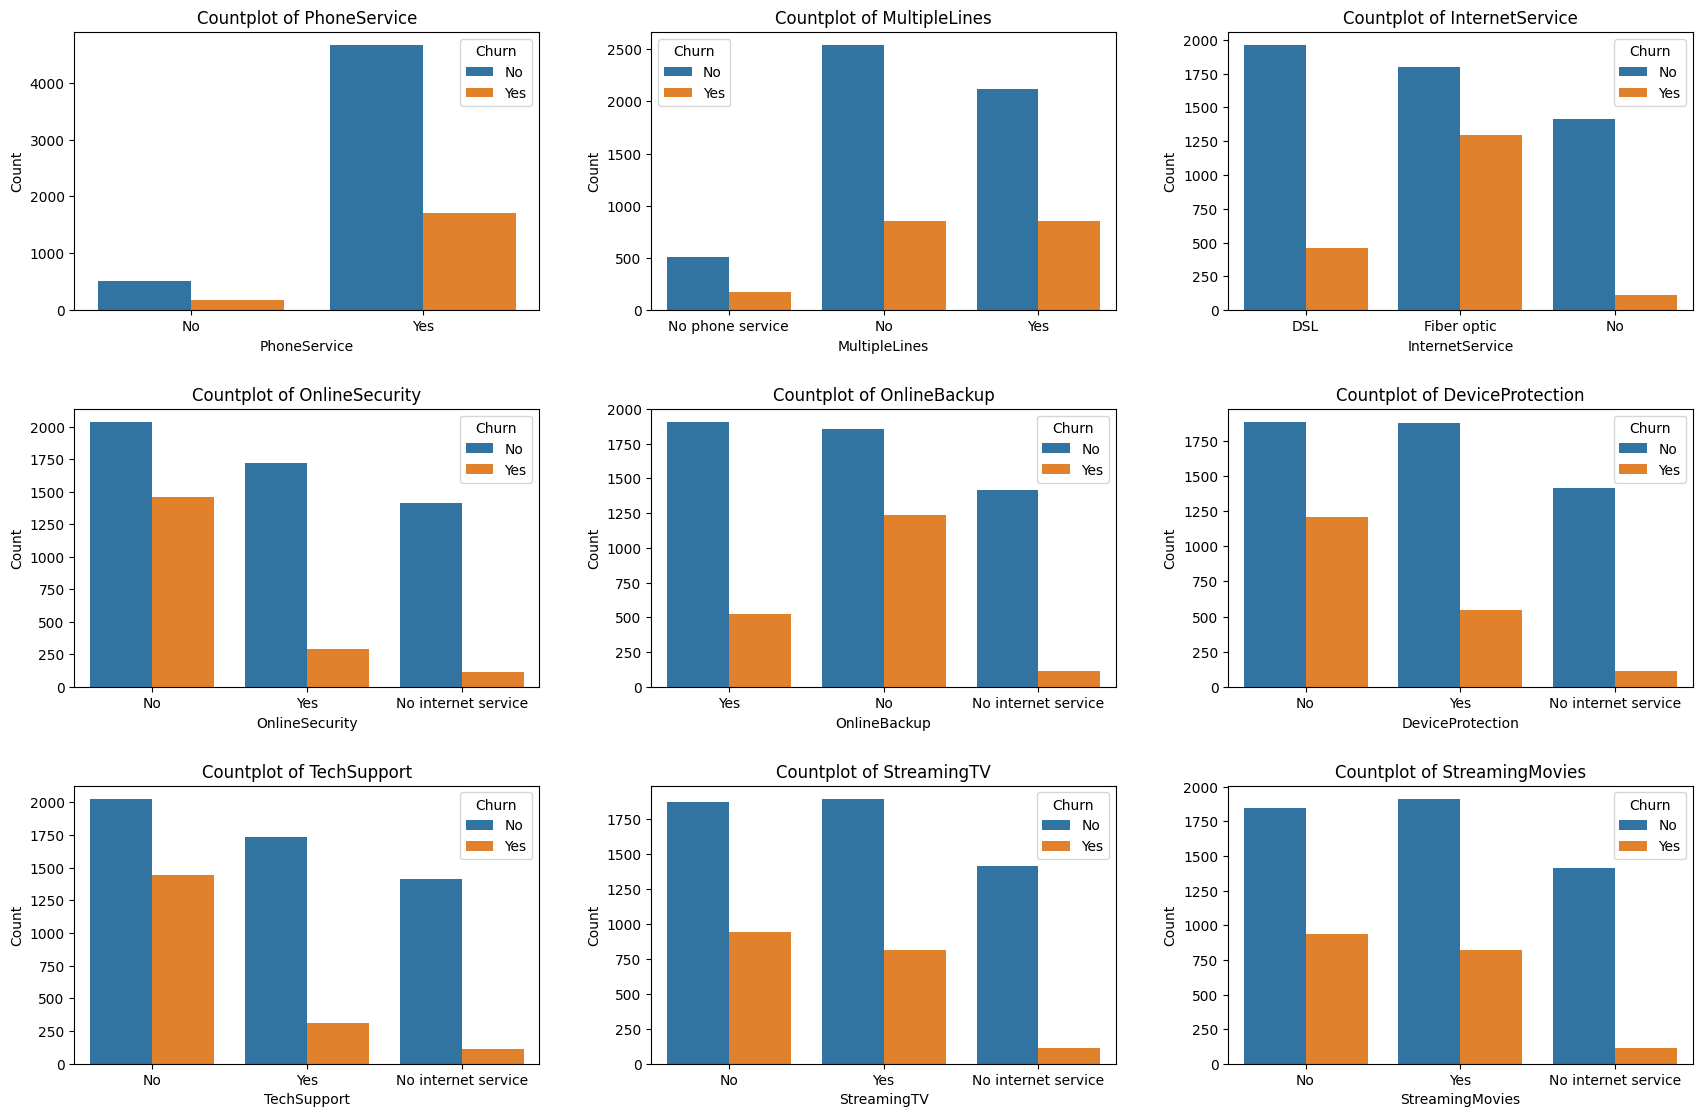

In [24]:
# List of columns for which you want to create countplots
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure and the subplots (3 rows and 3 columns for a total of 9 subplots)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))  # Adjust the figure size if needed
fig.tight_layout(pad=5.0)  # Adjust padding between plots

# Flatten the axes for easier indexing
axes = axes.flatten()

# Loop through the columns and axes
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Show the plot
plt.show()


#the majority of customers who do not Churn tend to have services like Phoneservice, Internetservice(Particularly DSL), and OnlineSecurity enabled. for services like OnlineBackup, TachSupport, and StreamingTv,Churn rates are noticeably higher when these services are not used or unavailable

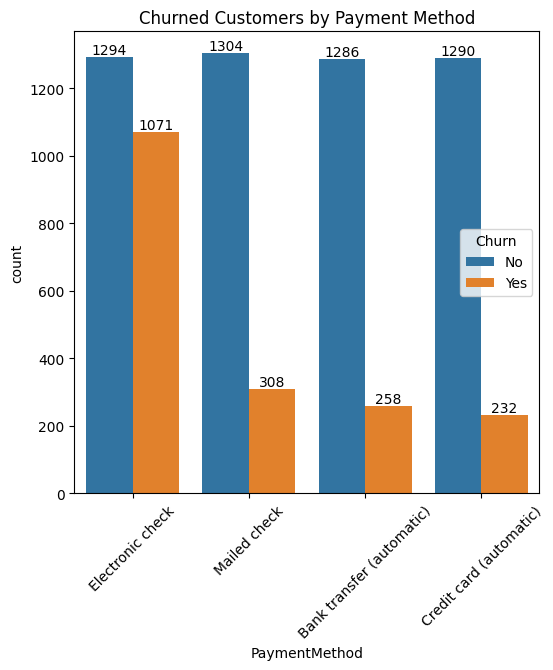

In [29]:
plt.figure(figsize = (6,6))
ax = sns.countplot(x = "PaymentMethod", data = df , hue = "Churn") 
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

#Customers is likely to Churn when he is using electronic Check as a payment Method